In [1]:
!date
!python --version

2024年 6月24日 月曜日 14時51分16秒 JST
Python 3.9.6


# classification_report, ConfusionMatrixDisplayの実行例
分類タスクにおける代表的な評価を出力するコード例。

基本的には (1) 教師ラベルのリスト、(2) 予測結果のリスト、(3) 表示用ラベルの3点を用意してから以下の関数を利用するだけで良い。本ノートブックでは教師ラベルのリストを y_true、予測結果のリストを y_predicted、表示用ラベルを labels として用意し、出力した例を示す。

- 参考
    - [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
    - [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)）

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


## データの用意

In [3]:
# 教師ラベルと推測ラベルを用意
y_true = ["negative", "positive", "positive", "normal"]
y_predicted = ["negative", "positive", "negative", "negative"] # 3,4番目が推定誤り

# ラベル名一覧を用意
# classification_report, confusion_matrixではラベル名がソート順で出力されるのでソートすると良い
labels = ["positive", "normal", "negative"]
sorted(labels)

['negative', 'normal', 'positive']

## classification_report
ラベル毎の precision, recall, f1-score, support を出力し、それに基づく総合評価もまとめて出力してくれる。

- precision（適合率）：正と予測した結果がどれだけ正しかったか。
- recall（再現率）：実際に正であったサンプルのうち、モデルが正と予測したサンプルの割合。
- F1-score（F1スコア）：適合率と再現率の調和平均。
- accuracy（正解率）：全てのサンプルのうち、正しく分類されたサンプルの割合。
- macro avg：サンプル数に基づいたスコア（単純平均）。
    - 例示した実行結果の場合、次のように求める。
    - precision: (1.00 + 0.00 + 0.33) / 3 = 0.44
    - recall: (0.50 + 0.00 + 1.00) / 3 = 0.50
    - f1-score: (0.67 + 0.00 + 0.50) / 3 = 0.39
- weighted avg：サンプル数に基づき重み調整したスコア。サンプル数の多いクラスのスコアをより重視する。
    - 例示した実行結果の場合、次のように求める。
    - precision: (1.00*2 + 0.00*1 + 0.33*1) / (2+1+1) = 0.58
    - recall: (0.50*2 + 0.00*1 + 1.00*1) / (2+1+1) = 0.50
    - f1-score: (0.67*2 + 0.00*1 + 0.50*1) / (2+1+1) = 0.46
    - サンプル数が多いクラス（positive）のスコアが相対的に高いため、総合評価も良くなっている。


In [4]:
# classification_report出力
# 教師ラベル、推測ラベル、表示用ラベルを与えて実行。
report = classification_report(y_true, y_predicted, labels=labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    positive       1.00      0.50      0.67         2
      normal       0.00      0.00      0.00         1
    negative       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.50      0.39         4
weighted avg       0.58      0.50      0.46         4



/Users/tnal/.venv/dm/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tnal/.venv/dm/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tnal/.venv/dm/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ConfusionMatrixDisplay
各ラベルに該当するサンプルをどのように推定したのかを確認する混合行列を出力する。
- 行の「True label」が教師データ。列の「Predicted label」が予測結果。
    - 例えば左上の1は、「教師ラベルpositiveとなるサンプル1つをpositiveと予測した（正解した）」ことを意味する。対角成分は正解したサンプル数を示すことになる。
    - 真ん中の行は「教師ラベルnormalとなるサンプル1つをpositiveと予測した」ことを意味している。
    - 下の行は「教師ラベルnegativeとなるサンプルは2つあり（行方向の総和=2）、一つはpositiveと推測、もう一つはnegativeと推測した」ことを意味している。

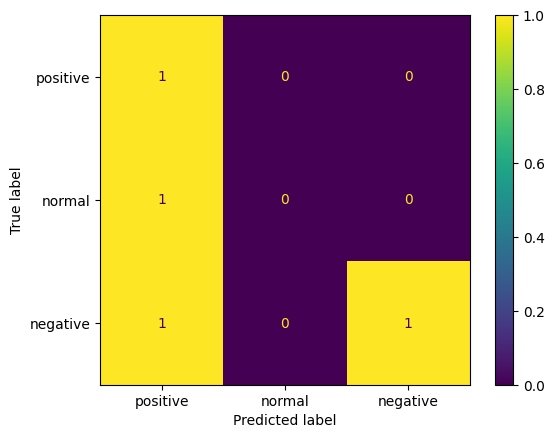

In [5]:
# ConfusionMatrixDisplay出力
# 事前に近藤行列を作成。出力時に近藤行列と表示用ラベルを与えて実行。
cm = confusion_matrix(y_true, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
